Skipping sub-category financial-planning due to insufficient class variety in training data.
Skipping sub-category home-inspection due to insufficient class variety in training data.
Skipping sub-category nutrition due to insufficient class variety in training data.
Skipping sub-category personal-trainer due to insufficient class variety in training data.
Skipping sub-category psychologist due to insufficient class variety in training data.


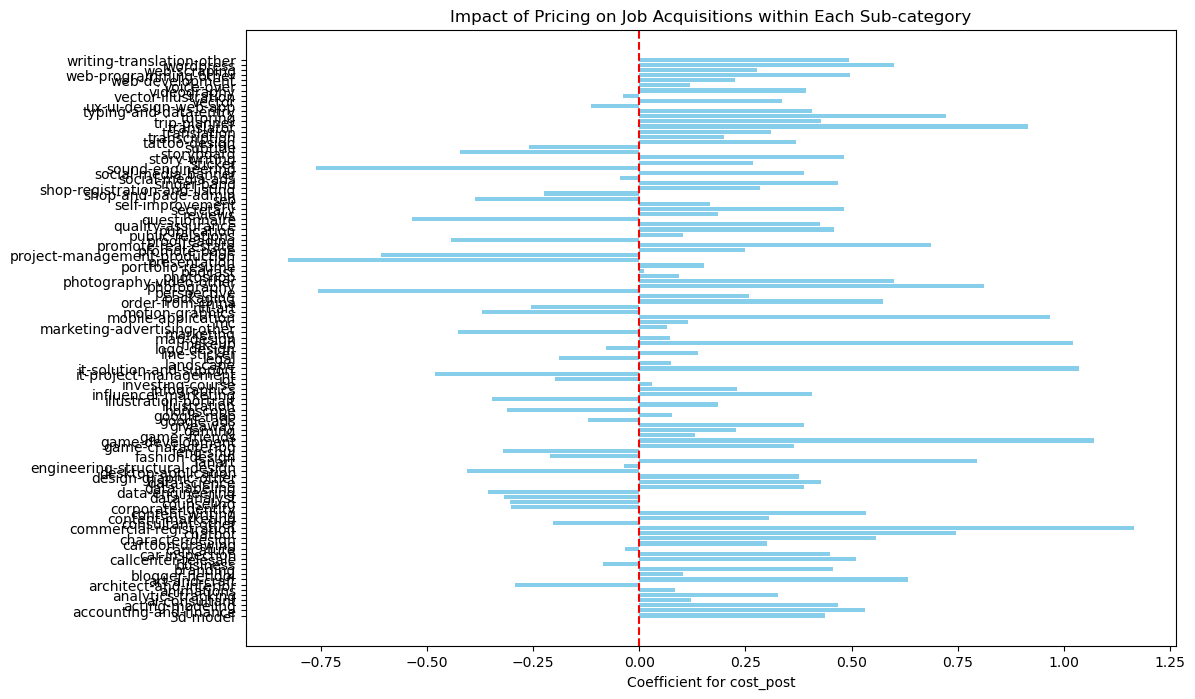

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the data
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Replace zeros with NaN and fill them with the median value
df['cost_post'] = df['cost_post'].replace(0, np.nan).fillna(df['cost_post'].median())

# Group by sub-category
grouped = df.groupby('sub_category_post')

# Initialize a dictionary to store the results
results = {}

# Loop through each group and perform logistic regression
for sub_category, group in grouped:
    if len(group) < 10:
        # Skip groups with too few samples
        continue

    X = group[['cost_post']]
    y = group['num_sold']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Check if there are at least two classes in y_train
    if len(np.unique(y_train)) < 2:
        print(f"Skipping sub-category {sub_category} due to insufficient class variety in training data.")
        continue

    # Initialize and fit the logistic regression model
    logreg = LogisticRegression(random_state=42, max_iter=500)
    logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Get the coefficient for cost_post
    coefficient = logreg.coef_[0][0]

    # Store the results
    results[sub_category] = {
        'Coefficient': coefficient,
        'Report': report
    }

# Prepare data for plotting
sub_categories = list(results.keys())
coefficients = [results[sub_category]['Coefficient'] for sub_category in sub_categories]

# Plot the coefficients
plt.figure(figsize=(12, 8))
plt.barh(sub_categories, coefficients, color='skyblue')
plt.xlabel('Coefficient for cost_post')
plt.title('Impact of Pricing on Job Acquisitions within Each Sub-category')
plt.axvline(x=0, color='red', linestyle='--')
plt.show()

Skipping sub-category home-inspection in main category Architecture_and_Engineering due to insufficient class variety in training data.
Skipping sub-category financial-planning in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category psychologist in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category nutrition in main category Lifestyle due to insufficient class variety in training data.
Skipping sub-category personal-trainer in main category Lifestyle due to insufficient class variety in training data.


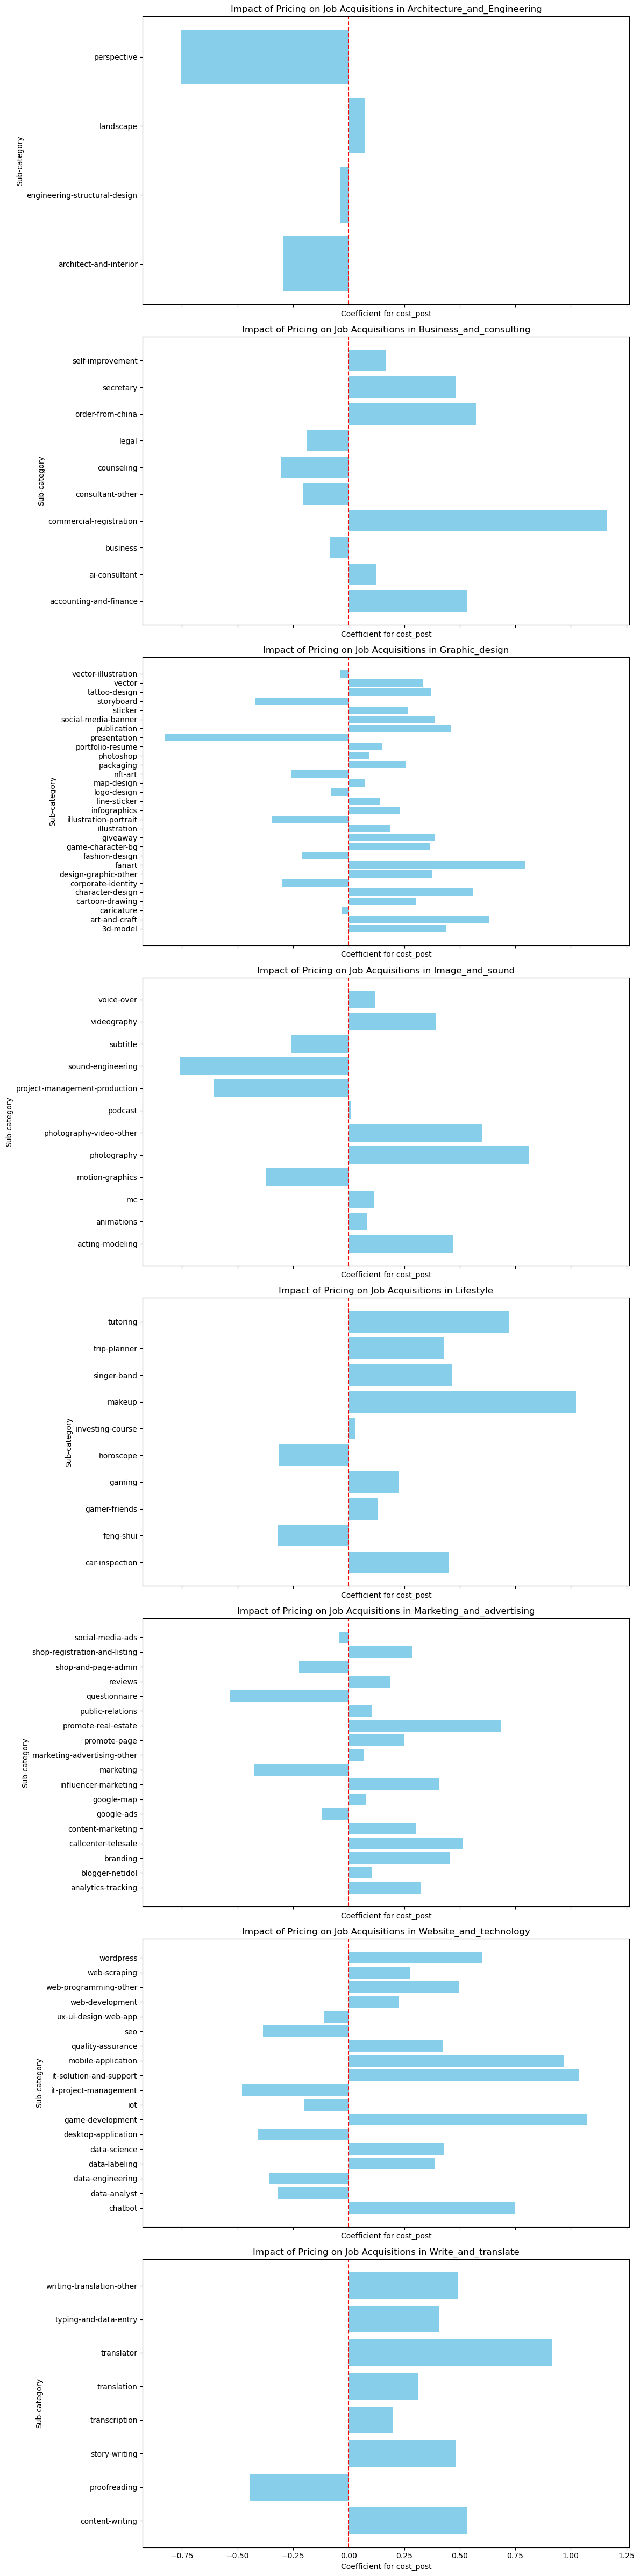

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the data
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Replace zeros with NaN and fill them with the median value
df['cost_post'] = df['cost_post'].replace(0, np.nan).fillna(df['cost_post'].median())

# Group by sub-category and main category
df['main_category'] = df['category_id_post']  # Assuming 'category_id_post' is the main category
grouped = df.groupby(['main_category', 'sub_category_post'])

# Initialize a dictionary to store the results
results = {}

# Loop through each group and perform logistic regression
for (main_category, sub_category), group in grouped:
    if len(group) < 10:
        # Skip groups with too few samples
        continue

    X = group[['cost_post']]
    y = group['num_sold']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Check if there are at least two classes in y_train
    if len(np.unique(y_train)) < 2:
        print(f"Skipping sub-category {sub_category} in main category {main_category} due to insufficient class variety in training data.")
        continue

    # Initialize and fit the logistic regression model
    logreg = LogisticRegression(random_state=42, max_iter=500)
    logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Get the coefficient for cost_post
    coefficient = logreg.coef_[0][0]

    # Store the results
    if main_category not in results:
        results[main_category] = {}

    results[main_category][sub_category] = {
        'Coefficient': coefficient,
        'Report': report
    }

# Plotting
fig, axes = plt.subplots(len(results), 1, figsize=(12, len(results) * 6), sharex=True)

if len(results) == 1:
    axes = [axes]  # Ensure axes is iterable when there's only one subplot

for ax, main_category in zip(axes, results.keys()):
    sub_categories = list(results[main_category].keys())
    coefficients = [results[main_category][sub_category]['Coefficient'] for sub_category in sub_categories]

    ax.barh(sub_categories, coefficients, color='skyblue')
    ax.set_title(f'Impact of Pricing on Job Acquisitions in {main_category}')
    ax.axvline(x=0, color='red', linestyle='--')
    ax.set_xlabel('Coefficient for cost_post')
    ax.set_ylabel('Sub-category')

plt.tight_layout()
plt.show()

Skipping sub-category home-inspection in main category Architecture_and_Engineering due to insufficient class variety in training data.
Skipping sub-category financial-planning in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category psychologist in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category nutrition in main category Lifestyle due to insufficient class variety in training data.
Skipping sub-category personal-trainer in main category Lifestyle due to insufficient class variety in training data.


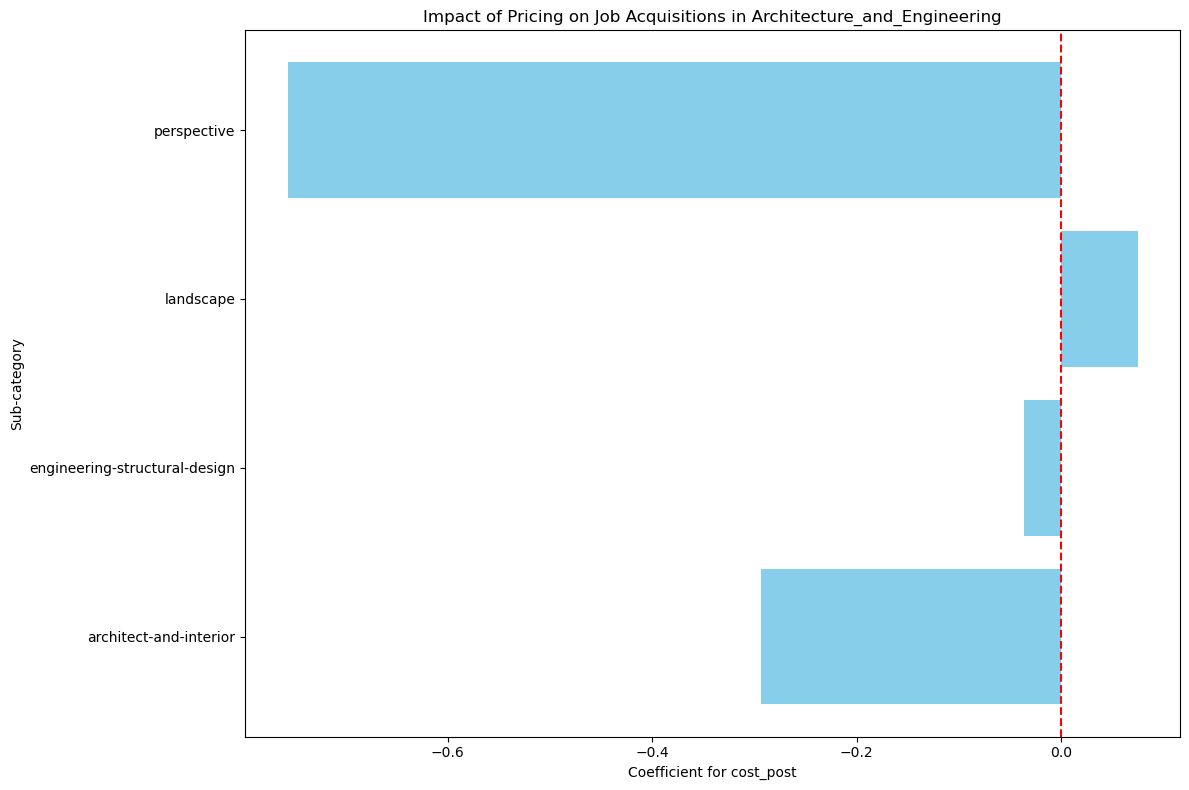

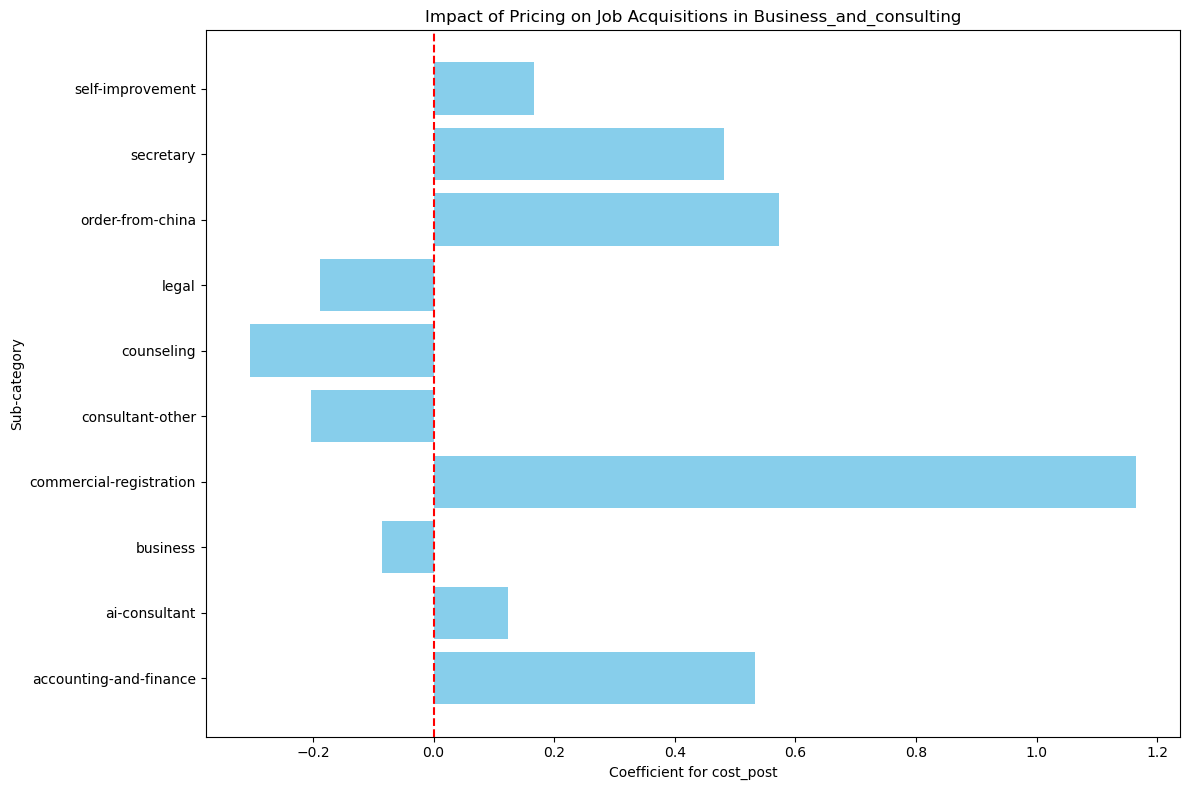

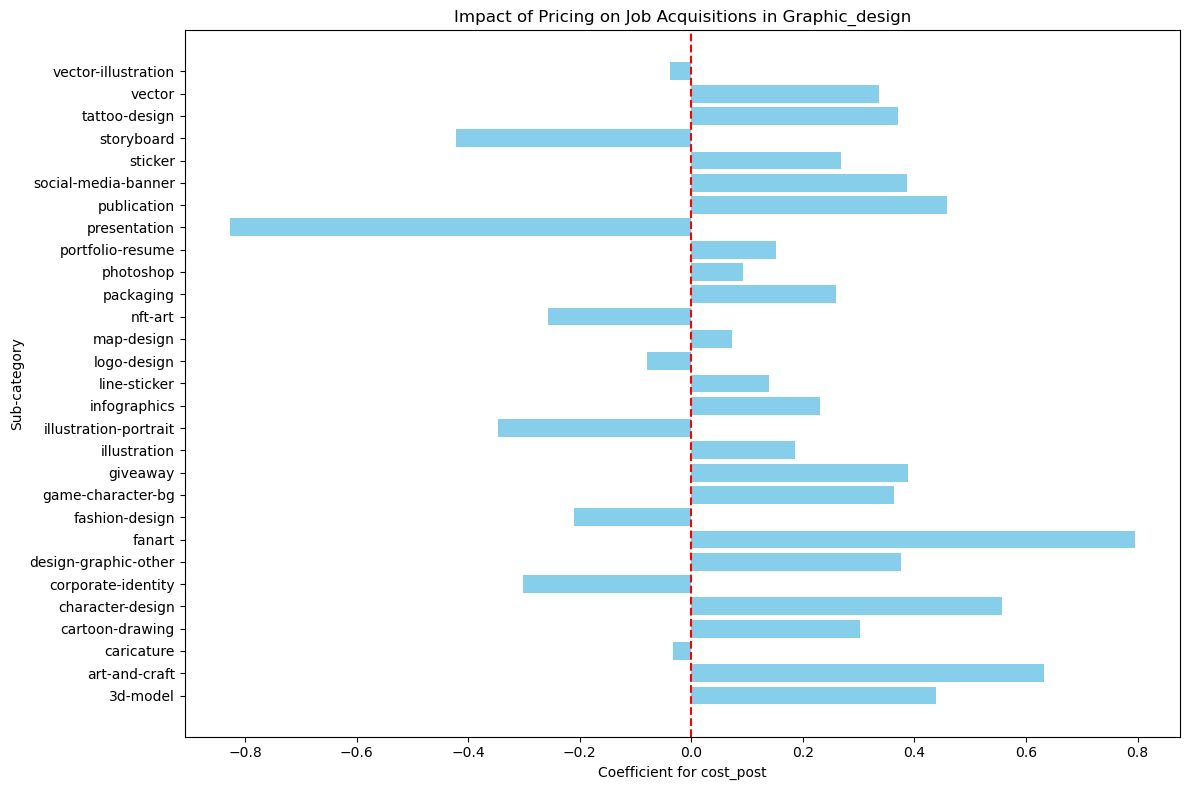

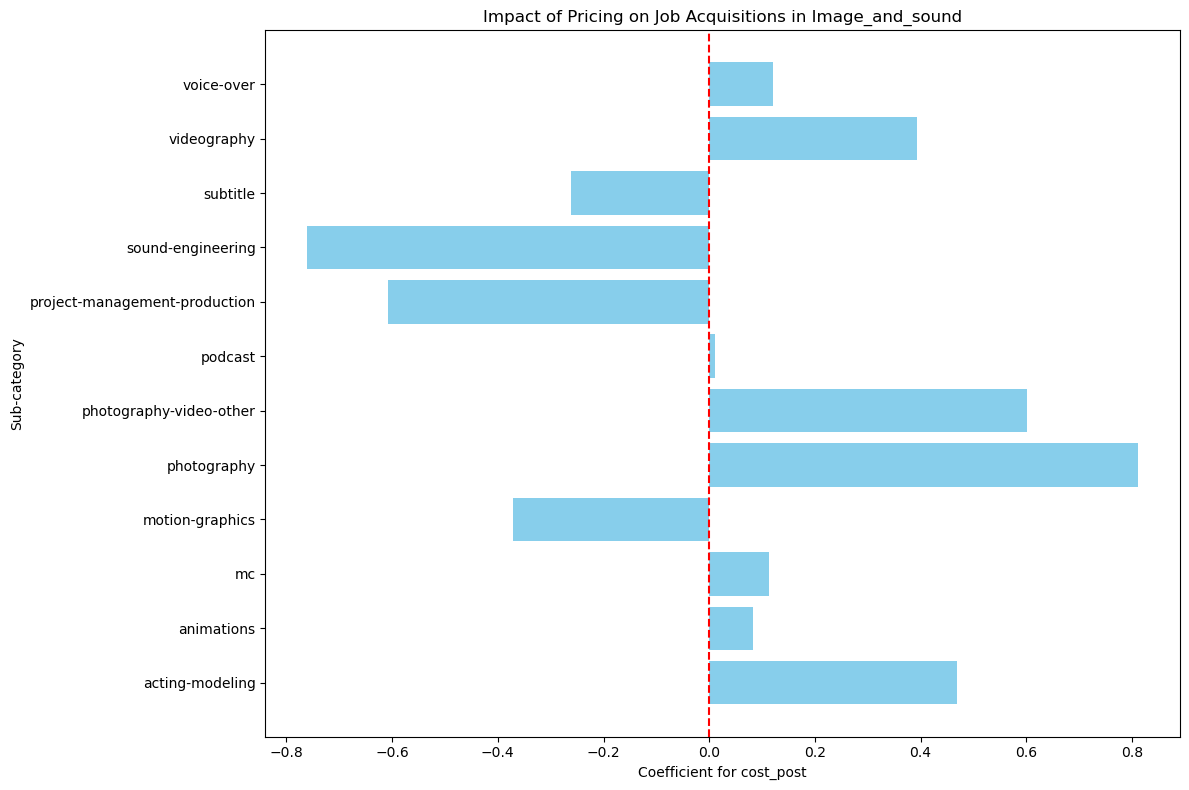

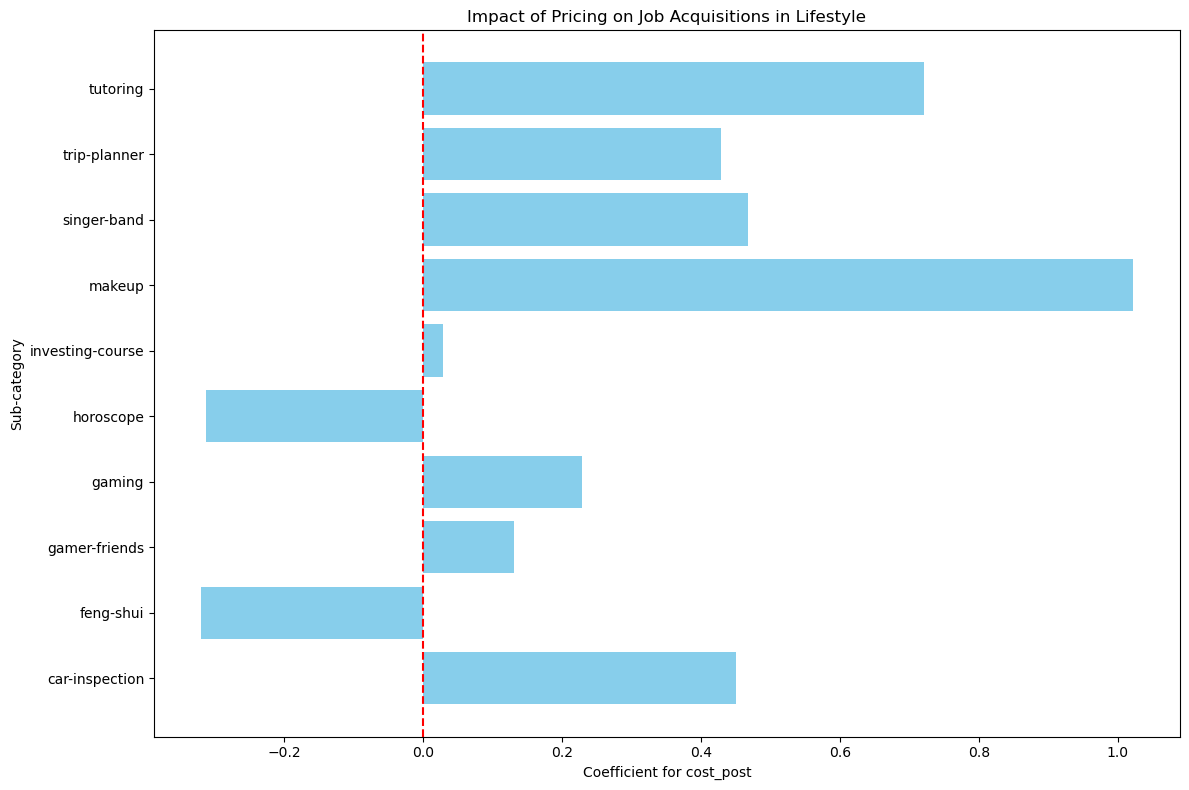

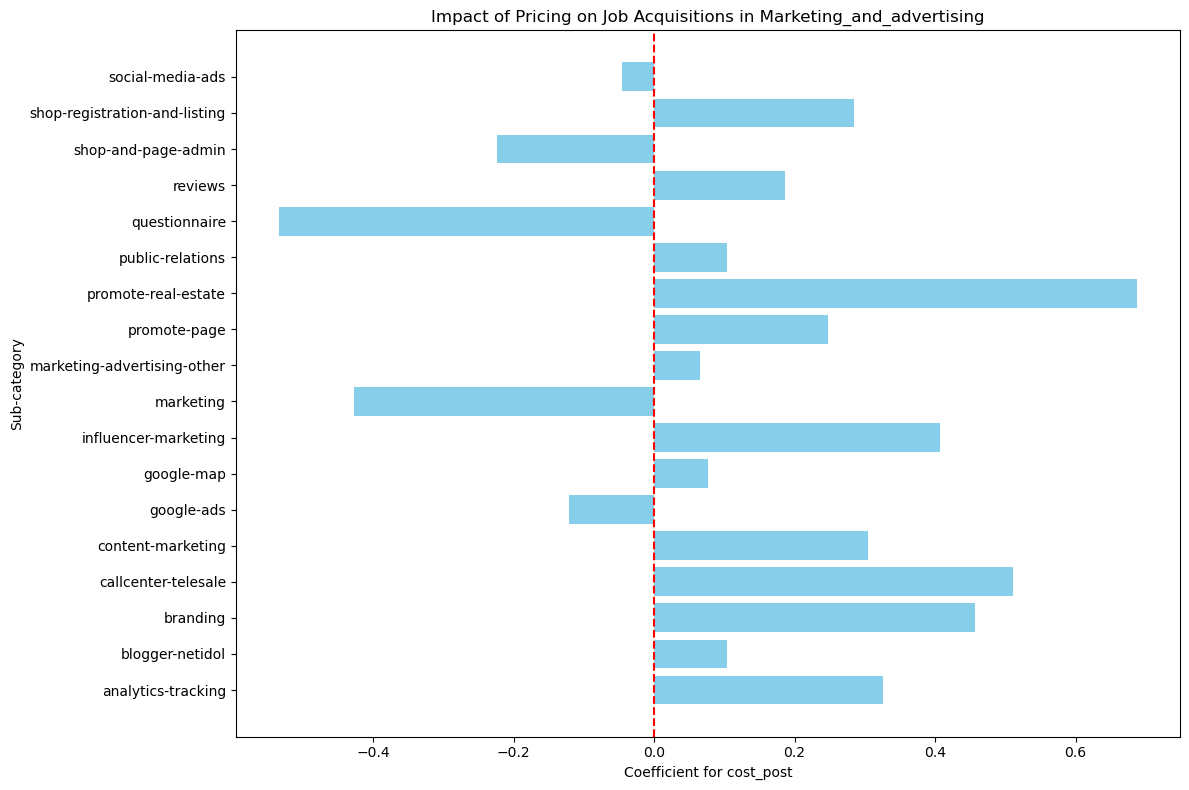

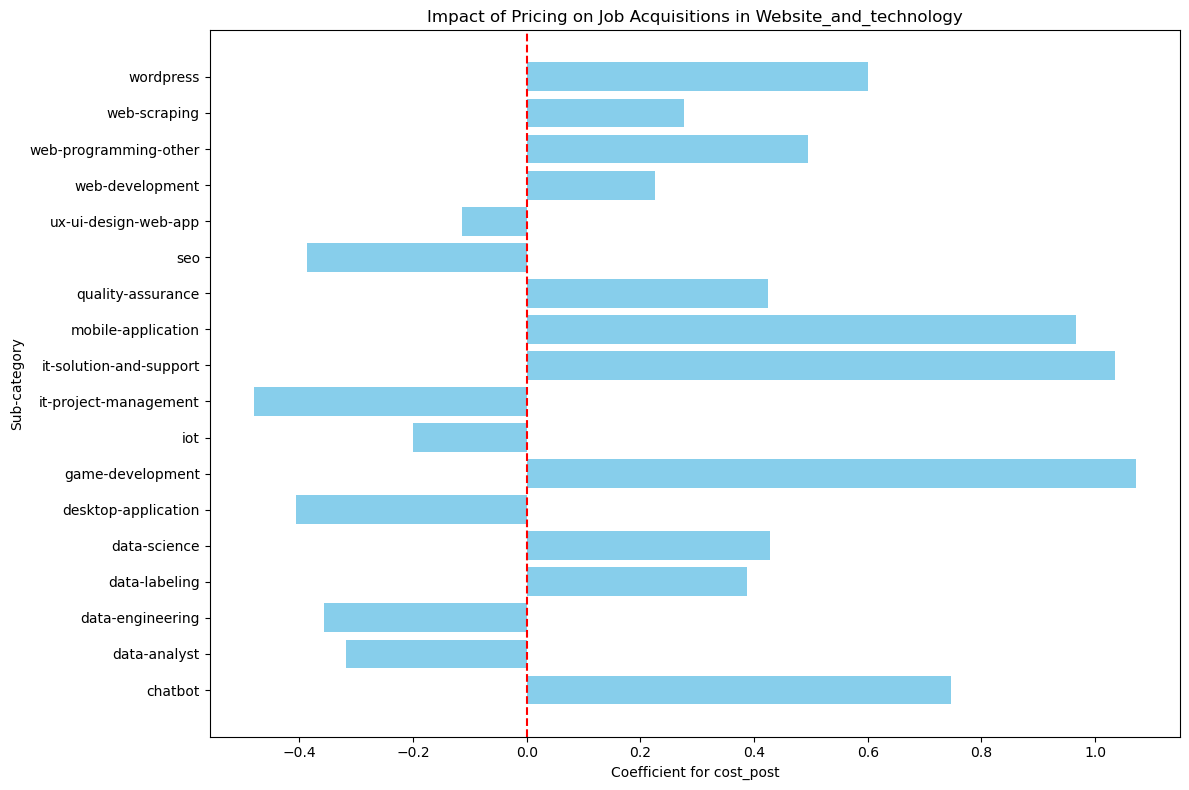

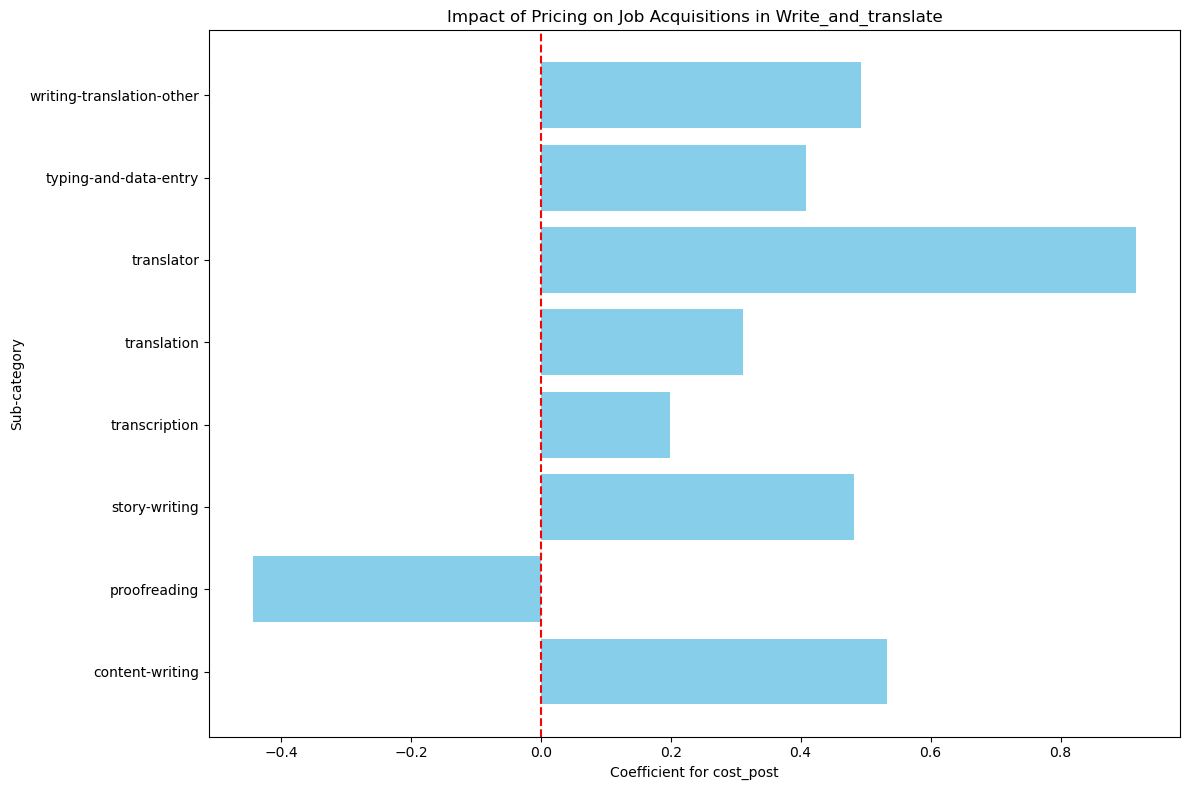

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Load the data
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Replace zeros with NaN and fill them with the median value
df['cost_post'] = df['cost_post'].replace(0, np.nan).fillna(df['cost_post'].median())

# Group by sub-category and main category
df['main_category'] = df['category_id_post']  # Assuming 'category_id_post' is the main category
grouped = df.groupby(['main_category', 'sub_category_post'])

# Initialize a dictionary to store the results
results = {}

# Loop through each group and perform logistic regression
for (main_category, sub_category), group in grouped:
    if len(group) < 10:
        # Skip groups with too few samples
        continue

    X = group[['cost_post']]
    y = group['num_sold']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Check if there are at least two classes in y_train
    if len(np.unique(y_train)) < 2:
        print(f"Skipping sub-category {sub_category} in main category {main_category} due to insufficient class variety in training data.")
        continue

    # Initialize and fit the logistic regression model
    logreg = LogisticRegression(random_state=42, max_iter=500)
    logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Get the coefficient for cost_post
    coefficient = logreg.coef_[0][0]

    # Store the results
    if main_category not in results:
        results[main_category] = {}

    results[main_category][sub_category] = {
        'Coefficient': coefficient,
        'Report': report
    }

# Plotting individual figures for each main category
for main_category in results.keys():
    sub_categories = list(results[main_category].keys())
    coefficients = [results[main_category][sub_category]['Coefficient'] for sub_category in sub_categories]

    plt.figure(figsize=(12, 8))
    plt.barh(sub_categories, coefficients, color='skyblue')
    plt.xlabel('Coefficient for cost_post')
    plt.title(f'Impact of Pricing on Job Acquisitions in {main_category}')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.ylabel('Sub-category')
    plt.tight_layout()
    plt.show()


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import os

# Load the data
df = pd.read_excel('/Users/kritsadakruapat/Desktop/mainTable/edited/JoinAndDropDup.xlsx')

# Drop duplicates based on the 'Post_ID_post' column
df.drop_duplicates(subset=['Post_ID_post'], inplace=True)

# Replace zeros with NaN and fill them with the median value
df['cost_post'] = df['cost_post'].replace(0, np.nan).fillna(df['cost_post'].median())

# Group by sub-category and main category
df['main_category'] = df['category_id_post']  # Assuming 'category_id_post' is the main category
grouped = df.groupby(['main_category', 'sub_category_post'])

# Initialize a dictionary to store the results
results = {}

# Loop through each group and perform logistic regression
for (main_category, sub_category), group in grouped:
    if len(group) < 10:
        # Skip groups with too few samples
        continue

    X = group[['cost_post']]
    y = group['num_sold']

    # Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

    # Check if there are at least two classes in y_train
    if len(np.unique(y_train)) < 2:
        print(f"Skipping sub-category {sub_category} in main category {main_category} due to insufficient class variety in training data.")
        continue

    # Initialize and fit the logistic regression model
    logreg = LogisticRegression(random_state=42, max_iter=500)
    logreg.fit(X_train, y_train)

    # Predict on the test set
    y_pred = logreg.predict(X_test)

    # Evaluate the model
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)

    # Get the coefficient for cost_post
    coefficient = logreg.coef_[0][0]

    # Store the results
    if main_category not in results:
        results[main_category] = {}

    results[main_category][sub_category] = {
        'Coefficient': coefficient,
        'Report': report
    }

# Create the directory if it doesn't exist
output_dir = '/Users/kritsadakruapat/Desktop/mainTable/pic'
os.makedirs(output_dir, exist_ok=True)

# Plotting individual figures for each main category and saving them
for main_category in results.keys():
    sub_categories = list(results[main_category].keys())
    coefficients = [results[main_category][sub_category]['Coefficient'] for sub_category in sub_categories]

    plt.figure(figsize=(12, 8))
    plt.barh(sub_categories, coefficients, color='skyblue')
    plt.xlabel('Coefficient for cost_post')
    plt.title(f'Impact of Pricing on Job Acquisitions in {main_category}')
    plt.axvline(x=0, color='red', linestyle='--')
    plt.ylabel('Sub-category')
    plt.tight_layout()

    # Save the figure
    plt.savefig(os.path.join(output_dir, f'{main_category}.png'))
    plt.close()

print("All plots have been saved successfully.")

Skipping sub-category home-inspection in main category Architecture_and_Engineering due to insufficient class variety in training data.
Skipping sub-category financial-planning in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category psychologist in main category Business_and_consulting due to insufficient class variety in training data.
Skipping sub-category nutrition in main category Lifestyle due to insufficient class variety in training data.
Skipping sub-category personal-trainer in main category Lifestyle due to insufficient class variety in training data.
All plots have been saved successfully.
